In [5]:
#Comenzaremos importando las librerias necesarias para manipular la informacion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Importamos los datasets provistos para el MVP

data_movies = pd.read_csv('movies_dataset.csv')

data_credits = pd.read_csv('credits.csv')

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_19088\2846471490.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movies = pd.read_csv('movies_dataset.csv')


In [7]:
#Damos un vistazo a los datasets
data_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
data_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


   ETL (Extraction, transformation and load)

 PRIMERAS TRANSFORMACIONES

Comenzaremos realizando las primeras transformaciones exigidas en las cosignas de este MVP 

In [9]:
'''Se comenzará con las consignas indicadas para realizar el MVP, a continuación se rellenaran los valores nulos de 'reveneu' y 'budget' con 0
  luego se convertiran todos sus valores a float para luego poder crear la columna return'''
#Primero debemos asegurarnos que todos los valores sean numericos en ambas columnas, si hay valores que no se puedan convertir quedaran como NaN
data_movies['revenue'] = pd.to_numeric(data_movies['revenue'], errors='coerce')
data_movies['budget'] = pd.to_numeric(data_movies['budget'], errors='coerce')
#Luego se rellenaran los valores nulos con 0, y aplicamos la conversion a float
data_movies['revenue'] = round(data_movies['revenue'].fillna(0).astype(float),2)
data_movies['budget'] = round(data_movies['budget'].fillna(0).astype(float),2)

In [10]:
#Creamos la columna "return" asegurandonos que en los casos donde budget se 0 solo devuelva el valor 0 y no un NaN
data_movies['return'] = round(data_movies.apply(lambda row: row['revenue'] / row['budget'] if row['budget'] != 0 else 0, axis=1),2)

In [11]:
'''Pasamos a la consigna donde tratamos la columna "release_date", le daremos formato AA-mm-dd con "to_datetime" y, con el parametro
errors='coerce' convertiremos los valores no validos a NaT. Luego eliminaremos todos los valores nulos y, posteriormente
crearemos la columna "release_year"'''
#Damos el formato AA-mm-dd
data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='%Y-%m-%d', errors='coerce')
#Eliminamos los valores nulos
data_movies.dropna(subset=['release_date'], inplace=True)
#Creamos la columna "release_year"
data_movies['release_year'] = data_movies['release_date'].dt.year

In [12]:
#Eliminamos las columnas que explicitaron en las consignas que no serviran
data_movies = data_movies.drop(columns=['adult','homepage','imdb_id','original_title','poster_path','video'])

Continuaremos con el ETL pero mientras realizaremos un EDA ligero para detectar posibles transformaciones rápidas de modo intuitivo, por ejempo revision a simple vista de nulos y otros.

In [13]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45376 non-null  object        
 3   id                     45376 non-null  object        
 4   original_language      45365 non-null  object        
 5   overview               44435 non-null  object        
 6   popularity             45376 non-null  object        
 7   production_companies   45376 non-null  object        
 8   production_countries   45376 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45376 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  status

- Podemos notar que las columnas "belongs_to_collection" tiene casi el 100% de nulos entonces procederemos a eliminarla
- De misma forma observamos que columna "tagline" tiene aproximadamente el 50% de sus valores nulos y, de acuerdo a lo que vimos en descripcion de datos es solo una frase celebre de la pelicula por lo tanto, procederemos a eliminarla porque no proporciona informacion relevane para este MVP y posee muchos nulos.
- Se observa que "id" y "popularity" estan en formato texto y son caracteristivas numericas, por lo tanto hay que modificarlos.

In [14]:
#Eliminamos "tagline" y "belongs_to_conection"
data_movies = data_movies.drop(columns=['belongs_to_collection', 'tagline'])

#Cambiamos formato a "id" y "popularity"
data_movies['id'] = data_movies['id'].astype(int)
data_movies['popularity'] = round(data_movies['popularity'].astype(float),2)

In [15]:
#Comenzaremos con las columnas anidadas, en este caso la columna "genres", ahora exploramos los datos
data_movies['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [16]:
#Podemos ver que son diccionarios de generos anidados dentro de estructura de listas. Los diccionarios solo tienen el "id" y "name"
#de los géneros, solo vamos a conservar el nombre de estos ya que el id no nos proporciona informacion
data_movies['genres'] = data_movies['genres'].fillna('[]').apply(eval)
#Hacemos una funcion que nos permita extraer el nombre de los géneros
def extraer_nombres(column):
    return [item['name'] for item in column]
#Creamos una columna "name_genre" donde se guardarán los nombres de las géneros asociados
data_movies['genres'] = data_movies['genres'].apply(extraer_nombres)
#Reemplazamos las listas vacias nuevamente por NaN
data_movies['genres'] = data_movies['genres'].replace([], np.nan)#Esto nos servira para indentificar datos nulos o vacios en el EDA

In [17]:
#Ahora vamos a continuar por la columna "production_companies", la visualizamos y exploramos, podemos notar que su composición es similar a
#la columna "genres", por lo tanto vamos a seguir los mismos pasos y solo quedarnos con el nombre de las empresas productoras.
data_movies['production_companies'].head()

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
Name: production_companies, dtype: object

In [18]:
#Cambiamos nulos por listas vacias y evaluamos como diccionarios
data_movies['production_companies'] = data_movies['production_companies'].fillna('[]').apply(eval)
#Creamos una columna "name_companie" donde se guardarán los nombres de las empresas productoras, aplicamos la función para extraer nombres
data_movies['production_companies'] = data_movies['production_companies'].apply(extraer_nombres)
#Reemplazamos las listas vacias nuevamente por NaN
data_movies['production_companies'] = data_movies['production_companies'].replace([], np.nan)

In [19]:
#Ahora vamos a continuar por la columna "production_countries", la visualizamos y exploramos, podemos notar que su composición es similar a
#la columna "genres", por lo tanto vamos a seguir los mismos pasos y solo quedarnos con el nombre de los paises.
data_movies['production_countries'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [20]:
#Cambiamos nulos por listas vacias y evaluamos como diccionarios
data_movies['production_countries'] = data_movies['production_countries'].fillna('[]').apply(eval)
#Creamos una columna "name_companie" donde se guardarán los nombres de las empresas productoras, aplicamos la función para extraer nombres
data_movies['production_countries'] = data_movies['production_countries'].apply(extraer_nombres)
#Reemplazamos las listas vacias nuevamente por NaN
data_movies['production_countries'] = data_movies['production_countries'].replace([], np.nan)

In [21]:
#Seguimos con la columna "spoken_languages", la visualizamos y exploramos, podemos notar que su composición es similar a
#la columna "genres", por lo tanto vamos a seguir los mismos pasos y solo quedarnos con el nombre de los idiomas.
data_movies['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
3             [{'iso_639_1': 'en', 'name': 'English'}]
4             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [22]:
#Cambiamos nulos por listas vacias y evaluamos como diccionarios
data_movies['spoken_languages'] = data_movies['spoken_languages'].fillna('[]').apply(eval)
#Creamos una columna "name_companie" donde se guardarán los nombres de las empresas productoras, aplicamos la función para extraer nombres
data_movies['spoken_languages'] = data_movies['spoken_languages'].apply(extraer_nombres)
#Reemplazamos las listas vacias nuevamente por NaN
data_movies['spoken_languages'] = data_movies['spoken_languages'].replace([], np.nan)

In [23]:
#Visualizamos los datos resultantes de las modificaciones en data_movies
data_movies.head(10)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,return,release_year
0,30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.95,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,Toy Story,7.7,5415.0,12.45,1995
1,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.02,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0,4.04,1995
2,0.0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.71,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Grumpier Old Men,6.5,92.0,0.00,1995
3,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.86,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Waiting to Exhale,6.1,34.0,5.09,1995
4,0.0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.39,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Father of the Bride Part II,5.7,173.0,0.00,1995
5,60000000.0,"[Action, Crime, Drama, Thriller]",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.92,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,"[English, Español]",Released,Heat,7.7,1886.0,3.12,1995
6,58000000.0,"[Comedy, Romance]",11860,en,An ugly duckling having undergone a remarkable...,6.68,"[Paramount Pictures, Scott Rudin Productions, ...","[Germany, United States of America]",1995-12-15,0.0,127.0,"[Français, English]",Released,Sabrina,6.2,141.0,0.00,1995
7,0.0,"[Action, Adventure, Drama, Family]",45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56,[Walt Disney Pictures],[United States of America],1995-12-22,0.0,97.0,"[English, Deutsch]",Released,Tom and Huck,5.4,45.0,0.00,1995
8,35000000.0,"[Action, Adventure, Thriller]",9091,en,International action superstar Jean Claude Van...,5.23,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171.0,106.0,[English],Released,Sudden Death,5.5,174.0,1.84,1995
9,58000000.0,"[Adventure, Action, Thriller]",710,en,James Bond must unmask the mysterious head of ...,14.69,"[United Artists, Eon Productions]","[United Kingdom, United States of America]",1995-11-16,352194034.0,130.0,"[English, Pусский, Español]",Released,GoldenEye,6.6,1194.0,6.07,1995


In [24]:
#Ahora pasaremos al df data_credits cuyas columnas "cast" y "crew" también tienen datos anidados.
#Cambiamos nulos por listas vacias y evaluamos como diccionarios los datos de "cast"
data_credits['cast'] = data_credits['cast'].fillna('[not found]').apply(eval)

#Ahora crearemos un nuevo df para desanidar la columna "cast" 
df_cast = pd.json_normalize(data_credits['cast'].explode())

In [25]:
#Visualizamos el df de los actores
df_cast

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,31.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,12898.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,7167.0,Don Rickles,2.0,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2.0,12899.0,Jim Varney,3.0,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18.0,Rex (voice),52fe4284c3a36847f8024fa5,2.0,12900.0,Wallace Shawn,4.0,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
...,...,...,...,...,...,...,...,...
564887,3.0,,52fe4ea59251416c7515d7d9,1.0,1090923.0,Nathalie Lissenko,1.0,None
564888,4.0,,52fe4ea59251416c7515d7dd,2.0,1136422.0,Pavel Pavlov,2.0,None
564889,5.0,,52fe4ea59251416c7515d7e1,0.0,1261758.0,Aleksandr Chabrov,3.0,None
564890,6.0,,52fe4ea59251416c7515d7e5,1.0,29199.0,Vera Orlova,4.0,/n1NXVGNzNxtqsMWxLT1h8GO8Kpi.jpg


In [26]:
#Cambiamos nulos por listas vacias y evaluamos como diccionarios los datos de "crew"
data_credits['crew'] = data_credits['crew'].fillna('[not found]').apply(eval)

#Ahora crearemos un nuevo df para desanidar la columna "crew" 
df_crew = pd.json_normalize(data_credits['crew'].explode())

In [27]:
#Visualizamos el df del equipo de produccion
df_crew

,credit_id,department,gender,id,job,name,profile_path
0,52fe4284c3a36847f8024f49,Directing,2.0,7879.0,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2.0,12891.0,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2.0,7.0,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2.0,12892.0,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0.0,12893.0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
...,...,...,...,...,...,...,...
465080,52fe4776c3a368484e0c8399,Sound,0.0,549356.0,Original Music Composer,Richard McHugh,None
465081,52fe4776c3a368484e0c839f,Camera,2.0,58818.0,Director of Photography,João Fernandes,None
465082,533bccebc3a36844cf0011a7,Directing,0.0,1085341.0,Director,Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg
465083,58ebbc26925141281908aa0a,Production,2.0,1195656.0,Producer,Joseph N. Ermolieff,None


In [28]:
'''Se puede notar que hay datos que no serviran para cumplir las consignas del proyecto, por lo tanto solo vamos a conservar el nombre de los
miembros del reparto de actores que nos ayudará con uno de los endpoints del MVP'''
#Aplicamos la formula para extraer nombres y lo guardamos en la nueva columna "cast_name"
data_credits['cast'] = data_credits['cast'].apply(extraer_nombres)

#A los valores vacios que hayan quedado los vamos a volver nulos para luego en el EDA rellenarlos con "not found"
data_credits['cast'] = data_credits['cast'].replace([], np.nan)

In [29]:
'''Para el caso de la columna "crew", de todos los miembros del equipo de producción de la pelicula, solo nos sirve el dato del nombre del
director de la misma, entonces los vamos a conservar en una nueva columna llamada "director" y desestimaremos el resto de la informacion'''
#Creamos una función que nos ayude a extraer los nombres de los directores en "crew"
def extraer_director(crew):
    for miembro in crew:
        if miembro.get('job') == 'Director':
            return miembro.get('name')
    return None
#Aplicamos la función y lo guardamos en la nueva columna "Director"
data_credits['director'] = data_credits['crew'].apply(extraer_director)

#A los valores vacios que hayan quedado los vamos a volver nulos para luego en el EDA rellenarlos con "not found"
data_credits['director'] = data_credits['director'].replace([], np.nan)


In [30]:
#Eliminamos la columna original "crew"
data_credits = data_credits.drop(columns=['crew'])

In [31]:
#Visualizamos el df data_credits y su composicion hasta ahora con los cambios realizados
data_credits.head()

,cast,id,director
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",862,John Lasseter
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",8844,Joe Johnston
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",15602,Howard Deutch
3,"[Whitney Houston, Angela Bassett, Loretta Devi...",31357,Forest Whitaker
4,"[Steve Martin, Diane Keaton, Martin Short, Kim...",11862,Charles Shyer


In [32]:
'''Ahora vamos a unir el df credits al df movies con el metodo merge y usando el "id" de las 
peliculas, en modo "left" para que se unan solo el reparto y los directores de pelicula que esten
listadas en movies'''
#Aplicamos merge para la unión
movies_credits_final = pd.merge(data_movies, data_credits, on='id', how='left')

   EDA (Analisis exploratorio de datos)

Seguiremos con un analisis de la información que nos va quedando en el dataset unido aplicando algunas descripciones estadisticas a las caracteristicas numericas y a las categoricas, también veremos nuevamente los valores nulos, y buscaremos valores duplicados y veremos si aparecen valores atípicos

In [33]:
#Buscaremos un resumen estadistico de las variables numericas
movies_credits_final.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,return,release_year
count,4.545200e+04,45452.000000,45452.000000,45452,4.545200e+04,45206.000000,45452.000000,45452.000000,4.545200e+04,45452.000000
mean,4.231201e+06,107991.064926,2.926791,1992-05-16 05:08:17.720672384,1.121905e+07,94.179821,5.623962,109.987283,6.589397e+02,1991.882579
min,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,26367.750000,0.390000,1978-10-08 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,59872.000000,1.130000,2001-09-01 12:00:00,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,156330.500000,3.690000,2010-12-16 06:00:00,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,547.490000,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000
std,1.742923e+07,112118.576134,6.006419,NaN,6.433916e+07,38.331639,1.915585,491.347202,7.463082e+04,24.057750


In [34]:
#Buscaremos un resumen estadistico de las variables categoricas
movies_credits_final.describe(include=['O'])

,genres,original_language,overview,production_companies,production_countries,spoken_languages,status,title,cast,director
count,45452,45441,44511,45452,45452,45452,45372,45452,45451,44616
unique,4065,89,44232,22668,2389,1843,6,42196,42657,17549
top,[Drama],en,No overview found.,[],[United States of America],[English],Released,Blackout,[],John Ford
freq,5006,32249,133,11818,17868,22410,45010,13,2354,66


In [35]:
#Evaluamos si hay 'id' duplicados, es decir, si hay peliculas duplicadas en el df final
movies_credits_final.duplicated(['id']).any()

np.True_

In [36]:
#Evaluamos los valores nulos/faltantes y su cantidad en el dataset
movies_credits_final.isnull().sum()

budget                    0
genres                    0
id                        0
original_language        11
overview                941
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                 246
spoken_languages          0
status                   80
title                     0
vote_average              0
vote_count                0
return                    0
release_year              0
cast                      1
director                836
dtype: int64

CONCLUSIONES PRELIMINARES

* Podemos observar que en la columna "status" se repite en casi el 100% del dataset el valor "Released", por lo tanto podemos eliminarla mas aún teniendo en cuenta que todas las películas tienen su fecha de estreno.
* En las columna "original_languages" vemos que se repite el idioma inglés en un alto porcentaje, aún asi la consideramos candidata a ser desestimada porque no aporta informacion relevante para recomendar películas.
* Respecto de la columna "overview" vemos que contiene pocos nulos, los vamos a rellenar con "not found", y a los valores "No overview found" los reemplazaremos por "not found" también para que haya uniformidad.
* Vemos que en la columna "runtime" hay valores atipicos, no existe películas de 1256 minutos. También hay valores nulos, estos vamos a rellenarlos con la media de los valores existentes en la columna.
* Las columnas "return", "budget" y "revenue" tienen en su gran mayoria valores en 0, lo que nos da una idea que no serán caracteristicas que nos agreguen una buena prediccion o ajuste a nuestro modelo, en efecto, podrían ser desestimadas para el endpoint de ML.
* En las columnas de "cast" y "director" vemos que han quedado nulos luego de la union de los 2 datasets, los vamos a rellenar con "not found" para cumplir con la uniformidad de valores faltantes.
* Por último, podemos ver que hay duplicados de peliculas, por lo tanto las eliminaremos.


In [37]:
#Eliminamos "status" y "original_languages"
movies_credits_final = movies_credits_final.drop(columns=['status', 'original_language'])

#Completamos los valores nulos de "\u00A0" con la media
movies_credits_final['runtime'] = movies_credits_final['runtime'].fillna(movies_credits_final['runtime'].mean())

#Columna "overview" reemplazamos valores nulos y "No overview found" con "not found"
movies_credits_final['overview'] = movies_credits_final['overview'].replace('No overview found', 'not found')
movies_credits_final['overview'] = movies_credits_final['overview'].fillna('not found')

#Rellenamos valores nulos en "cast" y en "director"
movies_credits_final['cast'] = movies_credits_final['cast'].fillna('not found')
movies_credits_final['director'] = movies_credits_final['director'].fillna('not found')

'''Eliminamos las peliculas duplicadas en base a la columna 'id', y queda el df en condiciones para continuar con el EDA a más 
profundidad y poder cumplir las consignas del MVP'''
movies_credits_final = movies_credits_final.drop_duplicates(subset='id')

In [38]:
#Visualizamos como ha resultado el ETL hasta el momento
movies_credits_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45346 non-null  float64       
 1   genres                45346 non-null  object        
 2   id                    45346 non-null  int64         
 3   overview              45346 non-null  object        
 4   popularity            45346 non-null  float64       
 5   production_companies  45346 non-null  object        
 6   production_countries  45346 non-null  object        
 7   release_date          45346 non-null  datetime64[ns]
 8   revenue               45346 non-null  float64       
 9   runtime               45346 non-null  float64       
 10  spoken_languages      45346 non-null  object        
 11  title                 45346 non-null  object        
 12  vote_average          45346 non-null  float64       
 13  vote_count           

In [39]:
#Exportamos el dataframe final a un csv
movies_credits_final.to_csv('dataset_final.csv')


In [40]:
'''Primer endpoint a desarrollar en la API:
def cantidad_filmaciones_mes( Mes ): Se ingresa un mes en idioma Español. Debe devolver la cantidad de
películas que fueron estrenadas en el mes consultado en la totalidad del dataset.'''

def cantidad_filmaciones_mes( Mes ):

    #Convertimos el nombre del mes en español a número
    meses = {
        'enero': 1,
        'febrero': 2,
        'marzo': 3,
        'abril': 4,
        'mayo': 5,
        'junio': 6,
        'julio': 7,
        'agosto': 8,
        'septiembre': 9,
        'octubre': 10,
        'noviembre': 11,
        'diciembre': 12
    }
    mes_a_numero = meses.get(Mes.lower())
    
    #Si no se ha ingresado un mes valido en español retornaremos el mensaje de advertencia
    if mes_a_numero not in [1,2,3,4,5,6,7,8,9,10,11,12] :
        return f"El mes '{Mes}' no es válido. Por favor ingresa un mes en español."
    
    #Si se ha ingresado un mes valido en español retornaremos la cantidad de filmaciones aplicando el siguiente filtro
    cantidad_pelis = movies_credits_final[movies_credits_final['release_date'].dt.month == mes_a_numero].shape[0]
    
    return f"En {Mes} fueron estrenadas {cantidad_pelis} películas."

In [41]:
#Hacemos una prueba a la funcion cantidad_filmaciones_mes
consulta_mes = cantidad_filmaciones_mes("mayo")
print(consulta_mes)

En mayo fueron estrenadas 3337 películas.


In [42]:
'''En el segundo endpoint se solicita:
def cantidad_filmaciones_dia( Dia ): Se ingresa un día en idioma Español. Debe devolver la cantidad de películas
que fueron estrenadas en día consultado en la totalidad del dataset.'''

def cantidad_filmaciones_dia(Dia):
    
    #Si el dia se debe ingresar en español tendremos que usar el metodo dayofweek en la consulta, para eso debemos mapear
    #los dias de la semana en su nombre en español a sus índices
    semanaDia = {"lunes": 0,"martes": 1,"miércoles": 2,"jueves": 3,"viernes": 4,"sábado": 5,"domingo": 6}

    #Pasamos a minuscula el dia ingresado en español en la consulta
    dia_minuscula = Dia.lower()

    #Si no se ha ingresado un día valido en español retornaremos el mensaje de advertencia
    if dia_minuscula not in semanaDia:
        return f"El día '{Dia}' no es válido. Por favor ingresar un día de la semana en español."
    
    #Nos quedamos con el indice del dia correspondiente
    indiceDia = semanaDia[dia_minuscula]

    #Ahora filtramos la cantidad de peliculas que se estrenaron en el dia ingresado
    cantidad_pelis = movies_credits_final[movies_credits_final['release_date'].dt.dayofweek == indiceDia].shape[0]

    return f"En los días {Dia} fueron estrenadas {cantidad_pelis} peliculas"

In [43]:
#Hacemos una prueba a la funcion cantidad_filmaciones_dia
consulta_dia = cantidad_filmaciones_dia("jueves")
print(consulta_dia)

En los días jueves fueron estrenadas 7520 peliculas


In [44]:
'''En el tercer endpoint se solicita:
def score_titulo( titulo_de_la_filmación ): Se ingresa el título de una filmación esperando como respuesta
el título, el año de estreno y el score.'''
def score_titulo(titulo_de_la_filmacion ):

   #Guardaremos en una variable los datos del df correpondiente al titulo ingresado. Aplicaremos minuscula
   pelicula = movies_credits_final[movies_credits_final['title'].str.lower() == titulo_de_la_filmacion.lower()]
   
   #Si no se ha encontrado la pelicula, devolvemos un mensaje de advertencia
   if pelicula.empty:
      return f"El nombre de la película '{titulo_de_la_filmacion}' no se encontró en la consulta. Por favor intente otro nombre."
    
   #Si la pelicula se ha encontrado, retornamos los datos solicitados
   año_estreno = pd.to_datetime(pelicula['release_date'].values[0]).year
   titulo = pelicula['title'].values[0]
   score = pelicula['popularity'].values[0]

   return f"La película '{titulo}' se ha estrenado el año {año_estreno} y cuenta con {score} de puntaje de popularidad asignado por TMDB"

In [45]:
#Hacemos una prueba a la funcion score_titulo
ver_peli = score_titulo('jumanji')
print(ver_peli)

La película 'Jumanji' se ha estrenado el año 1995 y cuenta con 17.02 de puntaje de popularidad asignado por TMDB


In [46]:
'''Para el cuarto endpoint se solicita:
def votos_titulo( titulo_de_la_filmación ): Se ingresa el título de una filmación esperando como respuesta el título, la cantidad
de votos y el valor promedio de las votaciones. La misma variable deberá de contar con al menos 2000 valoraciones, caso contrario,
debemos contar con un mensaje avisando que no cumple esta condición y que por ende, no se devuelve ningun valor.'''
def votos_titulo(titulo_de_la_filmacion):

   #Guardaremos en una variable los datos del df correpondiente al titulo ingresado. Aplicaremos minuscula
   pelicula = movies_credits_final[movies_credits_final['title'].str.lower() == titulo_de_la_filmacion.lower()]

   #Si no se ha encontrado la pelicula, devolvemos un mensaje de advertencia
   if pelicula.empty:
      return f"El nombre de la película '{titulo_de_la_filmacion}' no se encontró en la consulta. Por favor intente otro nombre."
   
   #Si la pelicula encontrada no tiene 2000 valoraciones o mas, informamos eso con un mensaje y pedimos otro titulo.
   if pelicula['vote_count'].values[0] < 2000:
      return f"La película '{titulo_de_la_filmacion}' no tiene al menos 2000 votos. Intente con otra pelicula por favor."
   
   cant_votos = pelicula['vote_count'].values[0]
   promedio_votos = pelicula['vote_average'].values[0]
   titulo = pelicula['title'].values[0]

   return f"La pelicula {titulo} tiene {promedio_votos} en promedio de votos y cuenta con un total de {cant_votos} valoraciones"

In [47]:
#Hacemos una prueba a la funcion votos_titulo
ver_pelicula = votos_titulo('spider-man')
print(ver_pelicula)

La pelicula Spider-Man tiene 6.8 en promedio de votos y cuenta con un total de 5398.0 valoraciones


In [48]:
'''Para el quinto endpoint se solicita:
def get_actor( nombre_actor ): Se ingresa el nombre de un actor que se encuentre dentro de un dataset debiendo devolver el éxito del
mismo medido a través del retorno. Además, la cantidad de películas que en las que ha participado y el promedio de retorno.
La definición no deberá considerar directores.'''
def get_actor(nombre_actor):
   
   nombre_actor = [nombre_actor]

   #Guardamos en una variable las filas o las peliculas del df donde se encuentre al actor
   peliculas_actor = movies_credits_final[movies_credits_final['cast'].apply(lambda x: any(d in x for d in nombre_actor))]

   #Si el actor ingresado no esta en la consulta devolvemos un mensaje de advertencia
   if peliculas_actor.empty:
       return f"El actor {nombre_actor} no se ha encontrado. Por favor intente con otro nombre o intente escribiendo las primeras letras con mayuscula."
   
   #Creamos las variables que filtran la consulta para luego mostrar en el resultado de la funcion
   retorno_actor = round(peliculas_actor['return'].sum(),2)
   retorno_promedio = round(peliculas_actor['return'].mean(),2)
   pelis_cantidad =  peliculas_actor['id'].shape[0]
   nombre_actor = nombre_actor[0]

   return f"El actor {nombre_actor} participó en {pelis_cantidad} peliculas con un retorno total de {retorno_actor} en millones de dolares, y ha tenido un promedio de {retorno_promedio} en millones de dolares de retorno por pelicula."

In [49]:
#Hacemos una prueba a la funcion nombre_actor
ver_actor = get_actor('Tom Cruise')
print(ver_actor)

El actor Tom Cruise participó en 47 peliculas con un retorno total de 183.02 en millones de dolares, y ha tenido un promedio de 3.89 en millones de dolares de retorno por pelicula.


In [50]:
'''Para el sexto endpoint se solicita:
def get_director( nombre_director ): Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el
éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno
individual, costo y ganancia de la misma.'''
def get_director(nombre_director):

    #Guardamos en una variable las filas o las peliculas del df donde se encuentre al director
    peliculas_director = movies_credits_final[movies_credits_final['director'] == nombre_director]

    #Si el director ingresado no esta en la consulta devolvemos un mensaje de advertencia
    if peliculas_director.empty:
        return f"El director {nombre_director} no se ha encontrado. Por favor intente con otro nombre o intente escribiendo las primeras letras con mayuscula."
    
    #Creamos las variables que filtran la consulta para luego mostrar en el resultado de la funcion
    retorno_director = round(peliculas_director['return'].sum(),2)
    exito_director = f"El director {nombre_director} en sus peliculas tuvo un retorno total de {retorno_director} en millones de dolares"

    return exito_director, peliculas_director[['title', 'release_date', 'budget', 'return']]

In [51]:
#Hacemos una prueba a la funcion get_director
ver_director = get_director('James Cameron')
print(ver_director)

('El director James Cameron en sus peliculas tuvo un retorno total de 54.24 en millones de dolares',                                 title release_date       budget  return
375                         True Lies   1994-07-14  115000000.0    3.29
582        Terminator 2: Judgment Day   1991-07-01  100000000.0    5.20
1093                        The Abyss   1989-08-09   70000000.0    1.29
1159                           Aliens   1986-07-18   18500000.0    9.91
1196                   The Terminator   1984-10-26    6400000.0   12.25
1641                          Titanic   1997-11-18  200000000.0    9.23
5646   Piranha Part Two: The Spawning   1981-01-01     145786.0    0.00
6157              Ghosts of the Abyss   2003-04-10   13000000.0    1.31
9664               Aliens of the Deep   2005-01-21          0.0    0.00
14574                          Avatar   2009-12-10  237000000.0   11.76
26591                        Avatar 2   2020-12-16          0.0    0.00
43979      T2 3-D: Battle Across Ti

A continuación realizaremos un EDA a mas profundidad para el modelado de Machine Learning y poder lograr un sistema de recomendación de peliculas. Comenzaremos revisando en la frecuencia de las categorias en las variables categóricas que tienen datos anidados para encontrar algun dato relevante. Se realizará el análisis filtrando el dataframe a partir de los años 1987 que el año desde el que estimamos el crecimiento de la industria se vuelve exponencial.

In [52]:
#Primero vamos a corroborar que no hayan quedado películas duplicadas en el dataset final, elegimos title y director.
ver_duplicados = movies_credits_final.duplicated(subset=['title', 'director'], keep=False)
ver_duplicados = movies_credits_final[ver_duplicados]

#Hacemos una inspeccion ocular de los valores duplicados en base a columnas 'title' y 'director'
ver_duplicados.sort_values(by='title')

,budget,genres,id,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,return,release_year,cast,director
24542,0.0,"[Animation, Science Fiction]",98622,A rag doll fights a monster that has been stea...,3.12,[],[],2005-04-21,0.0,11.0,[],9,7.4,74.0,0.00,2005,[],Shane Acker
14140,30000000.0,"[Action, Adventure, Animation, Science Fiction...",12244,"When 9 first comes to life, he finds himself i...",18.50,"[Focus Films, Starz Animation, Relativity Medi...",[United States of America],2009-08-19,48428063.0,79.0,[English],9,6.6,1291.0,1.61,2009,"[Christopher Plummer, Martin Landau, John C. R...",Shane Acker
28141,0.0,[Comedy],239650,When a family meets for Christmas at their pos...,1.14,[],[United States of America],2011-11-22,0.0,152.0,[English],A Madea Christmas,5.8,8.0,0.00,2011,"[Tyler Perry, Shannon Williams, Chandra Currel...",Tyler Perry
25581,0.0,"[Comedy, Drama]",175555,Madea dispenses her unique form of holiday spi...,4.47,[Lions Gate],[United States of America],2013-12-13,0.0,100.0,[English],A Madea Christmas,7.0,35.0,0.00,2013,"[Tyler Perry, Anna Maria Horsford, Tika Sumpte...",Tyler Perry
19577,39000000.0,"[Animation, Comedy, Family]",62214,"When a car hits young Victor's pet dog Sparky,...",10.30,[Tim Burton Productions],[United States of America],2012-10-04,35287788.0,87.0,[English],Frankenweenie,6.6,951.0,0.90,2012,"[Charlie Tahan, Catherine O'Hara, Martin Short...",Tim Burton
43384,1000000.0,"[Comedy, Family]",33914,When young Victor's pet dog Sparky (who stars ...,5.28,[Walt Disney Pictures],[United States of America],1984-12-14,0.0,29.0,[English],Frankenweenie,6.7,96.0,0.00,1984,"[Shelley Duvall, Daniel Stern, Barret Oliver, ...",Tim Burton
6829,0.0,"[Drama, Horror, Thriller]",10234,"Two psychotic young men take a mother, father,...",9.31,[Wega Film],[Austria],1997-05-14,0.0,103.0,[Deutsch],Funny Games,7.3,385.0,0.00,1997,"[Ulrich Mühe, Susanne Lothar, Arno Frisch, Fra...",Michael Haneke
12460,15000000.0,"[Horror, Thriller, Crime]",8461,"When Ann, husband George and son Georgie arriv...",6.84,"[Celluloid Dreams, Tartan Films, Film4, Warner...","[Austria, France, Germany, Italy, United Kingd...",2007-10-20,7938872.0,112.0,[English],Funny Games,6.3,562.0,0.53,2007,"[Naomi Watts, Tim Roth, Michael Pitt, Brady Co...",Michael Haneke
16477,9100000.0,"[Thriller, Action, Drama, Mystery]",14070,Sanjay a rich tycoon suffering from short term...,4.24,[Geetha Arts],[India],2008-12-25,76000000.0,183.0,[हिन्दी],Ghajini,6.9,84.0,8.35,2008,"[Aamir Khan, Asin Thottumkal, Jiah Khan, Prade...",A.R. Murugadoss
38537,3200000.0,"[Action, Drama, Mystery, Thriller]",69636,The film's story is around a rich business ent...,0.80,[Sri Saravanaa Creaations],[India],2005-10-14,0.0,150.0,"[தமிழ், తెలుగు]",Ghajini,6.6,13.0,0.00,2005,"[Suriya , Asin Thottumkal, Nayanthara, Manobal...",A.R. Murugadoss


In [53]:
#A simple vista no se encuentran duplicados, comparemos title con released_year en el df de duplicados para confirmacion final
ver_duplicados.duplicated(subset=['title','release_year']).any()

np.False_

In [54]:
#Revisemos nuevamente las estadisticas de las variables numéricas.
movies_credits_final.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,return,release_year
count,4.534600e+04,45346.000000,45346.000000,45346,4.534600e+04,45346.000000,45346.000000,45346.000000,4.534600e+04,45346.000000
mean,4.232580e+06,108042.219645,2.926151,1992-05-16 07:38:33.253649664,1.123366e+07,94.177816,5.624196,110.135293,6.604792e+02,1991.882834
min,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,26390.250000,0.390000,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,59852.500000,1.130000,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,156601.500000,3.690000,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,547.490000,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000
std,1.744373e+07,112187.326746,6.010983,NaN,6.440990e+07,38.244611,1.915339,491.899276,7.471800e+04,24.053040


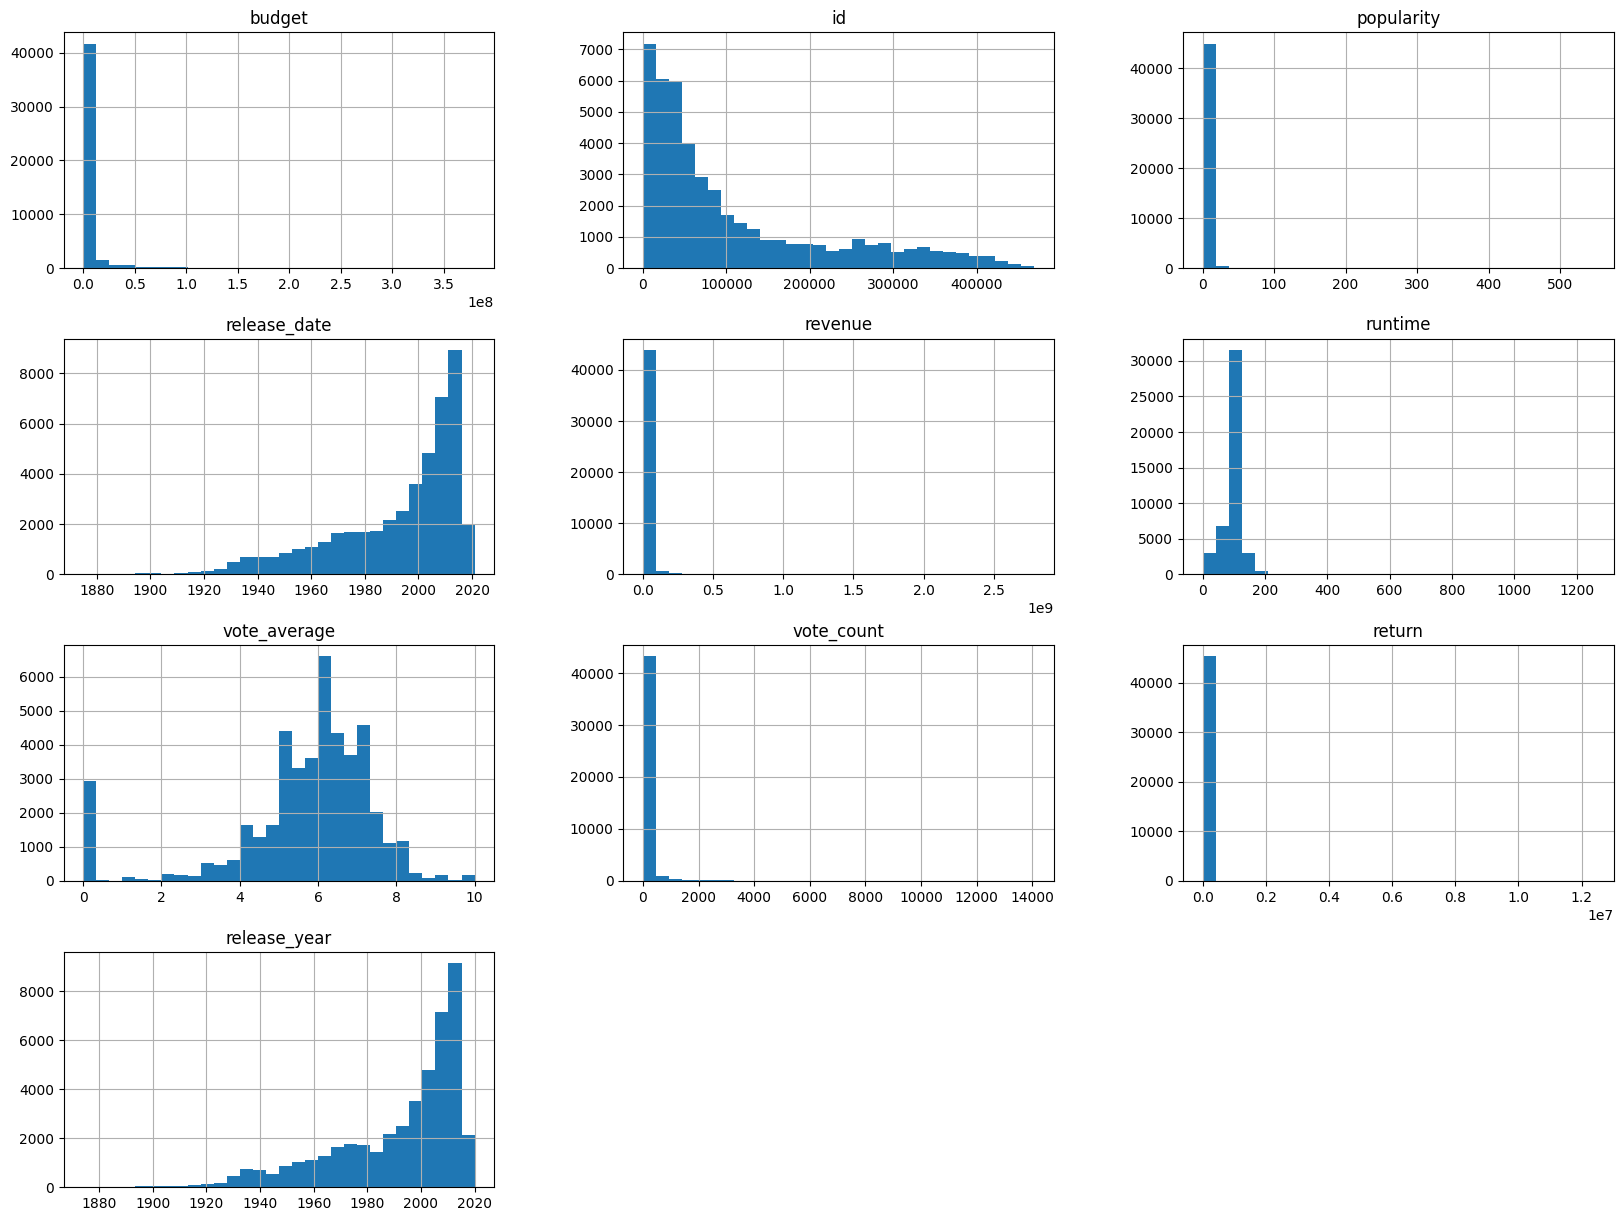

In [55]:
#Grafiquemos histogramas de las variables numericas
movies_credits_final.hist(bins=30, figsize=(20, 15))
plt.show()

De los histogramas podemos rescatar y inferir que de acuerdo a las columnas "release_date" y "release_year", desde los años 1990 aproximadamente el estreno de peliculas tuvo un crecimiento exponencial. Lo que refleja el crecimiento de la industria cinematográfica en la última década del siglo XX, lo que podría ayudarnos a elegir una muestra del dataset que comience aproximadamente a partir de dicha década.
Por otro lado, tanto en el resumen estadístico como en el histograma podemos ver en que las columnas "budget", "revenue" y "return" hay una gran cantidad de valores con 0, lo que probablemente no ayude a encontrar alguna relacion con otras caracteristicas.

A CONTINUACION VEAMOS UNA MATRIZ DE CORRELACIONES ENTRE LAS VARIABLES NUMERICAS

In [56]:
#Comenzaremos eligiendo una muestra filtrando el dataframe con las películas que se hayan estrendo a partir del año 1987
movies_desde_1987 = movies_credits_final[(movies_credits_final['release_year'] >= 1987)]

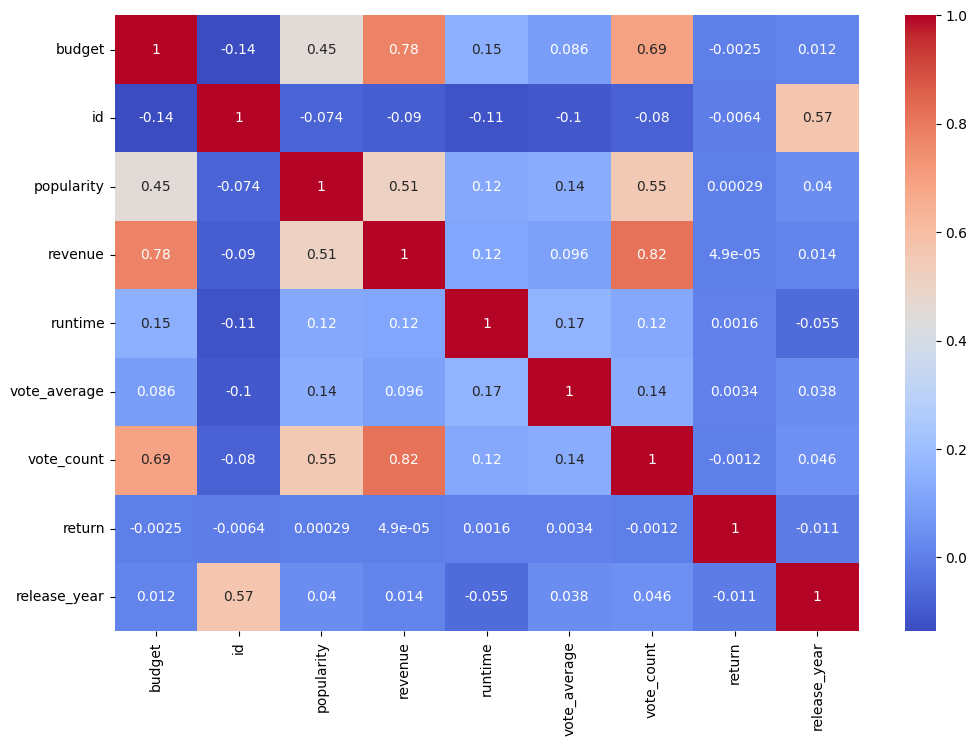

In [57]:
#Revisamos la relacion entre las variables numéricas
numeric_df = movies_desde_1987.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

Se observa que podemos averiguar que relacion existe entre:
  -  vote_count  &   budget
  -  revenue     &   budget
  -  revenue    &   vote_count
  -  popularity  &  revenue

Las demás variables numéricas, incluidas "runtime" que detectamos antes que tiene valores atípicos, no muestran un grado relevante de relación con otras variables.
Por lo tanto podremos preguntarnos:
- ¿un mayor presupuesto de peliculas logra una mayor recaudación?
- ¿las peliculas mas votadas son las que logran mayor recaudación?
- ¿las peliculas con mayor recaudación son las más populares?
- ¿un mayor presupuesto asegura una mayor cantidad de votos?

Veamos esas relaciones en graficos pares

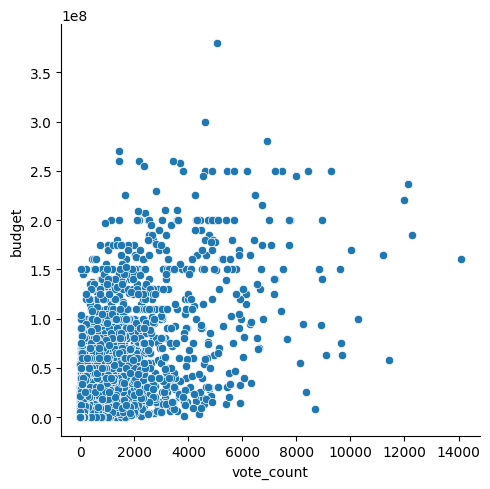

In [58]:
sns.relplot(x='vote_count', y='budget', data=movies_desde_1987)

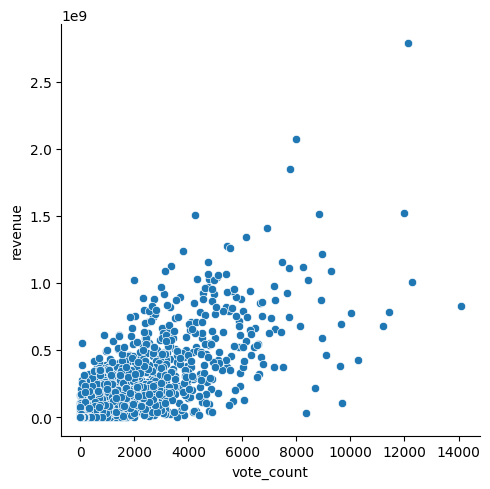

In [59]:
sns.relplot(x='vote_count', y='revenue', data=movies_desde_1987)

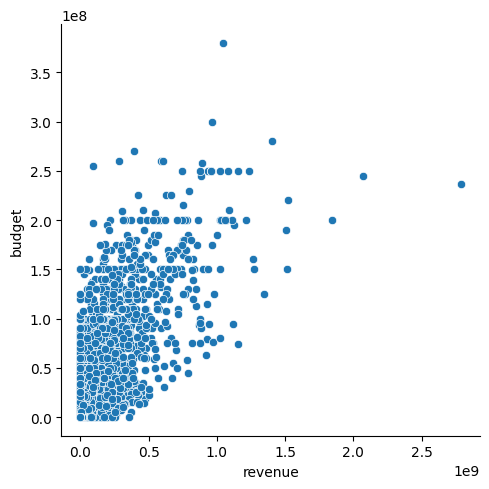

In [60]:
sns.relplot(x='revenue', y='budget', data=movies_desde_1987)

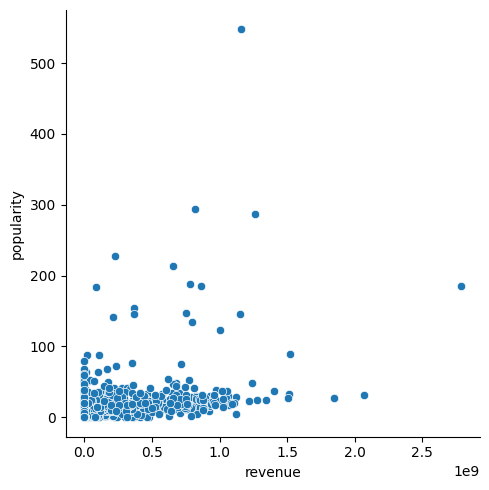

In [61]:
sns.relplot(x='revenue', y='popularity', data=movies_desde_1987)

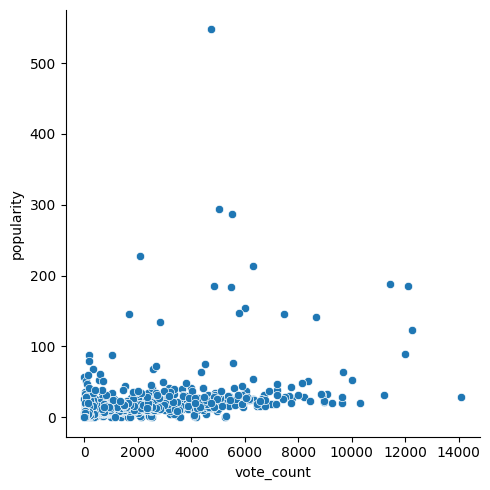

In [62]:
sns.relplot(x='vote_count', y='popularity', data=movies_desde_1987)

No podemos decir con toda seguridad que las relaciones se confirman revisando estos graficos precedentes, pero a grandes rasgos podriamos decir que:
- las peliculas con mayor presupuesto suelen tender a una recaudacion mayor... y es lo que se espera
- las peliculas con mayor recaudación no necesariamente son las mas populares
- las peliculas con mayor presupuesto y mayor recaudación suelen tener una mayor cantidad de votos
- las peliculas con mayor cantidad de votos no necesariamente tienen mayor popularidad

REVISEMOS UN POCO LOS DATOS DE LAS VARIABLES CATEGORICAS

In [63]:
#Buscammos la frecuencia de los idiomas en los que se encuentra la peliculas
#Desanidamos la columna "spoken_languages" en un nuevo datadrame
language_desanidado = movies_desde_1987['spoken_languages'].explode()
#Aplicamos frecuencia a los valores del df language_desanidado
language_freq = language_desanidado.value_counts()
#Reducimos la busqueda a idiomas que aparecen mas de una vez
language_freq = language_freq[language_freq > 40]


print(language_freq)

spoken_languages
English        19552
Français        2893
Deutsch         1792
Español         1759
日本語             1234
Pусский         1081
Italiano        1067
हिन्दी           648
普通话              634
한국어/조선말          529
Português        496
                 429
svenska          420
Polski           418
广州话 / 廣州話        381
Nederlands       294
العربية          293
suomi            289
Dansk            256
Magyar           248
Türkçe           204
עִבְרִית         187
Český            187
ภาษาไทย          170
Norsk            147
ελληνικά         145
فارسی            127
தமிழ்            110
Română           103
Srpski            91
Latin             84
తెలుగు            68
Íslenska          57
No Language       51
اردو              50
Tiếng Việt        47
Український       45
Hrvatski          43
Eesti             43
Name: count, dtype: int64


In [64]:
language_freq.std()

np.float64(3116.050968722449)

In [65]:
#Buscammos la frecuencia de los miembros del reparto de las peliculas
#Desanidamos la columna "cast" en un nuevo datadrame
cast_desanidado = movies_desde_1987['cast'].explode()
#Aplicamos frecuencia a los valores del df cast_desanidado
cast_freq = cast_desanidado.value_counts()
#Reducimos la busqueda a los actores y actrices con mas de 40 peliculas
cast_freq = cast_freq[cast_freq > 40]
print(cast_freq)


cast
Samuel L. Jackson       121
Danny Trejo             101
Frank Welker            100
Steve Buscemi           100
John Goodman             90
                       ... 
Ajay Devgn               41
Matt Dillon              41
Cloris Leachman          41
Charlize Theron          41
Jennifer Jason Leigh     41
Name: count, Length: 408, dtype: int64


In [66]:
cast_freq.std()

np.float64(11.752321853174305)

In [67]:
#Buscammos la frecuencia de las empresas realizadoras de las peliculas
#Desanidamos la columna "production_companies" en un nuevo datadrame
companies_desanidado = movies_desde_1987['production_companies'].explode()
#Aplicamos frecuencia a los valores del df companies_desanidado
companies_freq = companies_desanidado.value_counts()
#Reducimos la busqueda a los empresas que participaron en mas de 40 peliculas
companies_freq = companies_freq[companies_freq > 40]
print(companies_freq)



production_companies
Warner Bros.                              546
Universal Pictures                        487
Canal+                                    436
Paramount Pictures                        372
Twentieth Century Fox Film Corporation    300
                                         ... 
Sveriges Television (SVT)                  42
Spyglass Entertainment                     42
Original Film                              42
Legendary Pictures                         42
Constantin Film Produktion                 42
Name: count, Length: 101, dtype: int64


In [68]:
companies_freq.std()

np.float64(91.1214889176766)

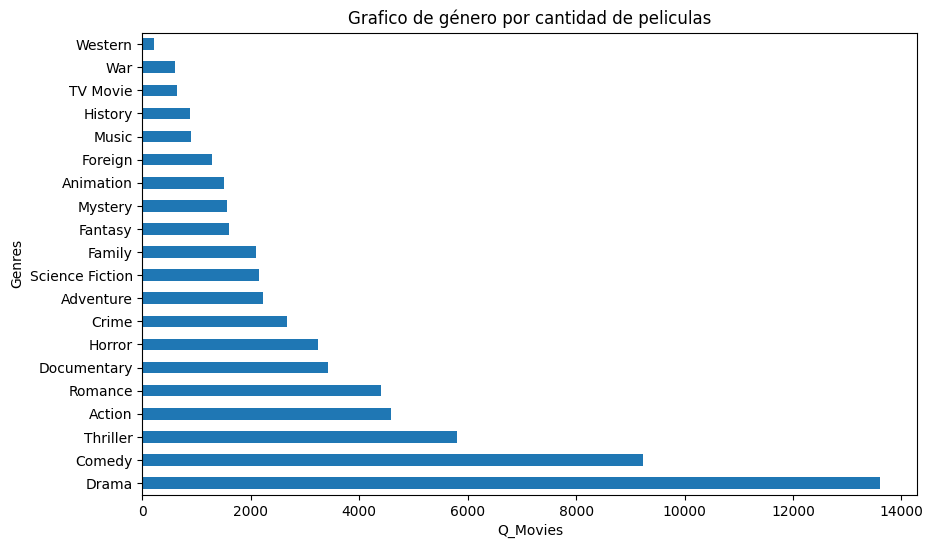

In [69]:
#Intentemos descubrir datos relevantes en el grafico de frecuencias de géneros 

#Desanidamos la columna "genres" en un nuevo datadrame
genres_desanidado = movies_desde_1987['genres'].explode()
#Aplicamos frecuencia a los valores del df genres_desanidado
genre_freq = genres_desanidado.value_counts()

plt.figure(figsize=(10,6)) 
genre_freq.plot(kind='barh')  
plt.title('Grafico de género por cantidad de peliculas')  
plt.xlabel('Q_Movies')  
plt.ylabel('Genres')  
plt.show()

Podemos concluir que las variables categoricas tienen un alto grado de diversidad, también hay definidos altas frecuencias en determinados valores predominantes como la de géneros o compañias productoras. Se puede apreciar que las variables categoricas nos ayudarán a obtener un sistema de recomendacion mas acertado que el que nos puedan brindar las variables numericas, principalmente porque la mayoría de estas últimas tienen muchos valores en cero y no guardan definidas relaciones entre ellas.
Aún así le vamos a dar una oportunidad a las variables numéricas.
Antes, hay que tener en cuenta que solo tenemos datos de las peliculas, no contamos con datos de preferencias de usuarios en particular. Por lo tanto el sistema de recomendación será en base a las caracteristicas de las películas, es decir, aplicaremos la técnica de filtro basado en contenido.

In [70]:
#Vamos a empezar aplicando valores máximos a runtime para apagar la influencia que puedan tener los outliers
movies_desde_1987["runtime"] = movies_desde_1987["runtime"].clip(upper=300)

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_19088\1664452311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_desde_1987["runtime"] = movies_desde_1987["runtime"].clip(upper=300)


In [71]:
movies_desde_1987['runtime'].describe()

count    31032.000000
mean        94.633144
std         33.289363
min          0.000000
25%         86.000000
50%         95.000000
75%        107.000000
max        300.000000
Name: runtime, dtype: float64

In [72]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# Seleccionar las características numéricas
numeric_cols = ['runtime', 'release_year', 'popularity','vote_count', 'vote_average', 'revenue']

muestra = movies_desde_1987[numeric_cols].sample(n=10000, random_state=42)

from sklearn.decomposition import PCA


# Normalizar los datos (escalar entre 0 y 1)
scaler = MinMaxScaler()
movies_num_scla = scaler.fit_transform(muestra)

#Red dimens
pca = PCA(n_components=4)
df_reducido = pca.fit_transform(movies_num_scla)
matriz_de_similitud = cosine_similarity(df_reducido)

#Función para obtener recomendaciones
def recomendacion_n(titulo):
    # Obtener el índice de la película
    indice_pelicula = movies_credits_final[movies_credits_final['title'].str.lower() == titulo.lower()].index

    if indice_pelicula.empty:
        return f"No se encontró la película con el título: {titulo}. Intente con el nombre original"
    
    # Obtener los índices de las películas más similares
    similar_movies = matriz_de_similitud[indice_pelicula[0]].argsort()[::-1]

    # Obtener los títulos de las películas recomendadas
    recomendaciones = movies_credits_final[['release_year','title']].iloc[similar_movies[1:6]]


    return recomendaciones

In [73]:
recomendar_peliculas = recomendacion_n('titanic')
print(recomendar_peliculas)

      release_year                                  title
5869          1982                     The King of Comedy
9711          1999                               Gorgeous
5853          2001                                  Asoka
2571          1999  Austin Powers: The Spy Who Shagged Me
3880          1997                   Secrets of the Heart


Podemos ver que la recomendacion de películas usando las variables numéricas funciona con las técnicas aplicadas.
Ahora vamos a aplicar un filtro basado en contenido pero con las variables categóricas. Usaremos las columnas "overview" y "genres".

In [74]:
#Primero vamos a crear una muestra aleatoria de 5000 peliculas estrenadas desde el año 1987
movies_muestra = movies_credits_final[(movies_credits_final['release_year'] >= 1987)].sample(n=5000, random_state=42)

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

movies_muestra['director'] = movies_muestra['director'].astype(str)

movies_muestra['cast'] = movies_muestra['cast'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

#Comenzamos por la columna genres
movies_muestra['genres'] = movies_muestra['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')

#Se crea una columna que combine los valores de las que serán vectorizadas
movies_muestra['vectorizable'] = movies_muestra['director'] + ' ' + movies_muestra['genres'] + ' ' + movies_muestra['cast']

#Pasar a minúsculas todos los textos para no influir en la cantidad generada
movies_muestra['vectorizable'] = movies_muestra['vectorizable'].str.lower()

#Inicializamos el HashingVectorizer para vectorizar el texto en una matriz de características. La dimensión de la matriz se establece en 1000.
hash_vectorizer = HashingVectorizer(stop_words='english', n_features=1000)

#Transformamos los datos
hash_matrix = hash_vectorizer.fit_transform(movies_muestra['vectorizable'])

#Calcular la similitud coseno
matriz_de_similitud2 = cosine_similarity(hash_matrix)

def recomendacion(titulo):
    # Obtener el índice de la película
    indice_pelicula = movies_credits_final[movies_credits_final['title'].str.lower() == titulo.lower()].index

    if indice_pelicula.empty:
        return f"No se encontró la película con el título: {titulo}. Intente con el nombre original"
         
    #Obtener los índices de las películas más similares
    peliculas_similares = matriz_de_similitud2[indice_pelicula[0]].argsort()[::-1]

   
    #Obtener los títulos de las películas recomendadas
    recomendaciones = movies_credits_final[['title']].iloc[peliculas_similares[1:6]]
    
    recomendaciones = recomendaciones['title'].tolist()

    return recomendaciones

In [75]:
recomendar_peliculas2 = recomendacion('toy story')
print(recomendar_peliculas2)

['Atlantic City', 'Faust', 'Croupier', 'American Pie 2', 'Drugstore Cowboy']


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

#A continuación desarrollaremos en endpoint de machine learning
#Comenzaremos eligiendo una muestra filtrando el dataframe con las películas que se hayan estrendo a partir del año 1987
movies_muestra = movies_credits_final[(movies_credits_final['release_year'] >= 1987)].sample(n=8000, random_state=42)

#Hacemos el preprocesamiento de los datos, convertimos a strig los datos de las columnas que usaremos para vectorizar
movies_muestra['director'] = movies_muestra['director'].astype(str)
movies_muestra['cast'] = movies_muestra['cast'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
movies_muestra['genres'] = movies_muestra['genres'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else '')
movies_muestra['overview'] = movies_muestra['overview'].astype(str)

#Se crea una columna que combine los valores de las que serán vectorizadas
movies_muestra['vectorizable'] = movies_muestra['director'] + ' ' + movies_muestra['genres'] + ' ' + movies_muestra['cast'] + ' ' + movies_muestra['overview']

#Se pasa a minúsculas todos los textos para no influir en la cantidad generada
movies_muestra['vectorizable'] = movies_muestra['vectorizable'].str.lower()

#Creamos una instancia de TfidfVectorizer para vectorizar el texto en una matriz de características
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)

#Transformar los datos
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_muestra['vectorizable'])

#Se calcula la similitud coseno
matriz_de_similitud2 = cosine_similarity(tfidf_matrix)

def recomendacion(titulo):
   
    #Obtenemos el índice de la película
    indice_pelicula = movies_credits_final[movies_credits_final['title'].str.lower() == titulo.lower()].index
    
    #Si no está la película ingresada, enviamos un mensaeje
    if indice_pelicula.empty:
        return f"No se encontró la película con el título: {titulo}. Intente con el nombre original"
    
    # Obtener los índices de las películas más similares
    peliculas_similares = matriz_de_similitud2[indice_pelicula[0]].argsort()[::-1]

    # Obtener los títulos de las películas recomendadas
    recomendaciones = movies_credits_final[['release_year','title']].iloc[peliculas_similares[1:6]]

    recomendaciones = recomendaciones['title'].tolist()

    return recomendaciones

In [77]:
recomendar_peliculas2 = recomendacion('toy story')
print(recomendar_peliculas2)

['Devils on the Doorstep', 'The Front Page', 'Ordinary People', 'The Iron Ladies', 'Ararat']


Vamos a inclinarnos por incluir el sistema de recomendación que hicimos con variables categóricas en el último endpoint de MVP. Aplicaremos TfidfVectorizer para crear la matriz de similitud ya que su proceso nos funcionó en Render